## Bivariate analysis - Categorical vs Categorical - Chi square test

In [1]:
import pandas as pd
import numpy as np
from pydataset import data

In [9]:
from scipy.stats import chi2_contingency

In [3]:
survey = data('survey')
survey.head()

,Sex,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
1,Female,18.5,18.0,Right,R on L,92.0,Left,Some,Never,173.0,Metric,18.250
2,Male,19.5,20.5,Left,R on L,104.0,Left,None,Regul,177.8,Imperial,17.583
3,Male,18.0,13.3,Right,L on R,87.0,Neither,None,Occas,NaN,NaN,16.917
4,Male,18.8,18.9,Right,R on L,NaN,Neither,None,Never,160.0,Metric,20.333
5,Male,20.0,20.0,Right,Neither,35.0,Right,Some,Never,165.0,Metric,23.667


In [5]:
survey.shape

(237, 12)

## Does exercise depends on smoking habit??
### H0 : Exercise habit does not depend on smoking habit
### H1 : Exercise habit does depend on smoking habit

In [8]:
# Convert the columns of smoke and exer column into cross table

table = pd.crosstab(index=survey['Smoke'],columns=survey['Exer'])
table

Exer,Freq,None,Some
Smoke,,,
Heavy,7,1,3
Never,87,18,84
Occas,12,3,4
Regul,9,1,7


In [10]:
# Lets test the hypo.
chi2_contingency(table)

(5.488545890584232,
 0.48284216946545633,
 6,
 array([[ 5.36016949,  1.0720339 ,  4.56779661],
        [92.09745763, 18.41949153, 78.48305085],
        [ 9.25847458,  1.85169492,  7.88983051],
        [ 8.28389831,  1.65677966,  7.05932203]]))

### As p-value - 0.4885, chi-stats - 5.4828, degree-freedom - (4-1)*(3-1) = 6
### Here, p-value is greater than alpha(0.05) so we will accepting the null hypotheis
### So, Exercise habit does not depend on smoking habit

In [12]:
## Mean age for each smoker and exercise

mean_age = survey.groupby(['Smoke','Exer'])['Age'].mean().reset_index()
mean_age

,Smoke,Exer,Age
0,Heavy,Freq,22.773714
1,Heavy,None,20.917000
2,Heavy,Some,18.333667
3,Never,Freq,20.151379
4,Never,None,21.176000
5,Never,Some,20.179607
6,Occas,Freq,19.465250
7,Occas,None,25.805667
8,Occas,Some,18.875250
9,Regul,Freq,21.500000


In [13]:
## Converting the data into wide data - step 1

df_wide = mean_age.pivot(index='Smoke',columns='Exer',values='Age')
df_wide

Exer,Freq,None,Some
Smoke,,,
Heavy,22.773714,20.917000,18.333667
Never,20.151379,21.176000,20.179607
Occas,19.465250,25.805667,18.875250
Regul,21.500000,17.583000,21.154857


In [25]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [9,5]

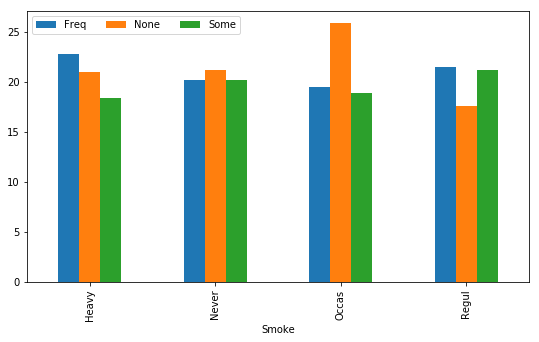

In [28]:
## Lets convert wide-data into group-bar char

df_wide.plot(kind = 'bar')

# Adjusting the legends
ax = plt.subplot(111)
ax.legend(loc = 'upper left', ncol = 3)

plt.show()

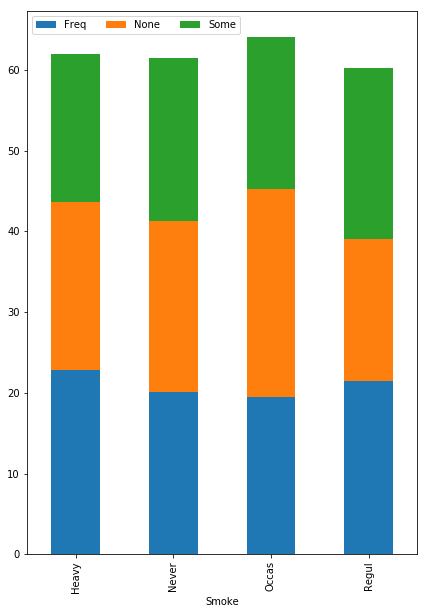

In [31]:
plt.rcParams['figure.figsize'] = (7,10)
df_wide.plot(kind = 'bar', stacked = True)

# Adjusting the legends
ax = plt.subplot(111)
ax.legend(loc = 'upper left', ncol = 3)

plt.show()